# **MODULE 10 🔥**

## **Exercise**

##### **1. Melakukan *import* beberapa library yang dibutuhkan.**


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### **2. Melakukan read dataset menggunakan library pandas dan menampilkan isi data beserta atribut yang ada.**

In [98]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### **3.  Melihat gambaran dan ringkasan secara umum dari dataset.**

In [99]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### **4. Memastikan bahwa tidak ada data yang null (kosong) sehingga dapat dipastikan bahwa data konsisten dan tidak menyebabkan error.**

In [100]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


##### **5. Melakukan beberapa visualisasi terhadap data yang ada untuk meningkatkan pemahaman kita tentang dataset yang akan digunakan dalam eksperimen.**

<ipython-input-101-adbde3f749be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Blues')


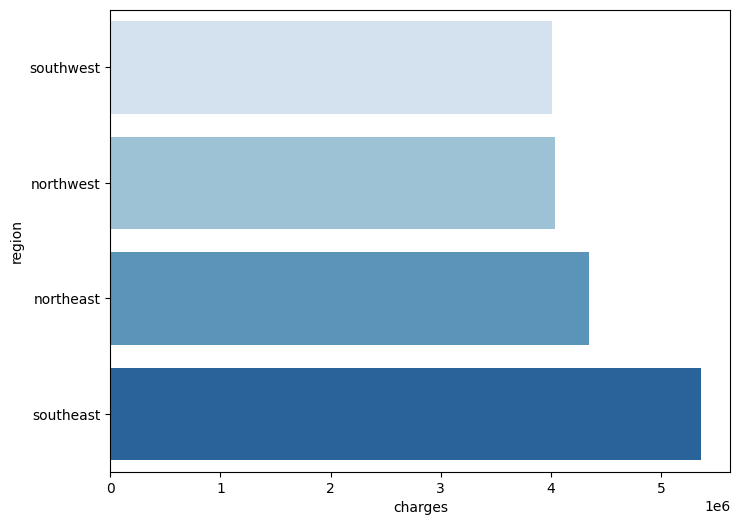

In [101]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Blues')

##### **6. Melakukan analisa terhadap data-data yang lain meliputi jenis kelamin, merokok atau tidak dan jumlah anak (khusus data yang dalam format kategorikal).**

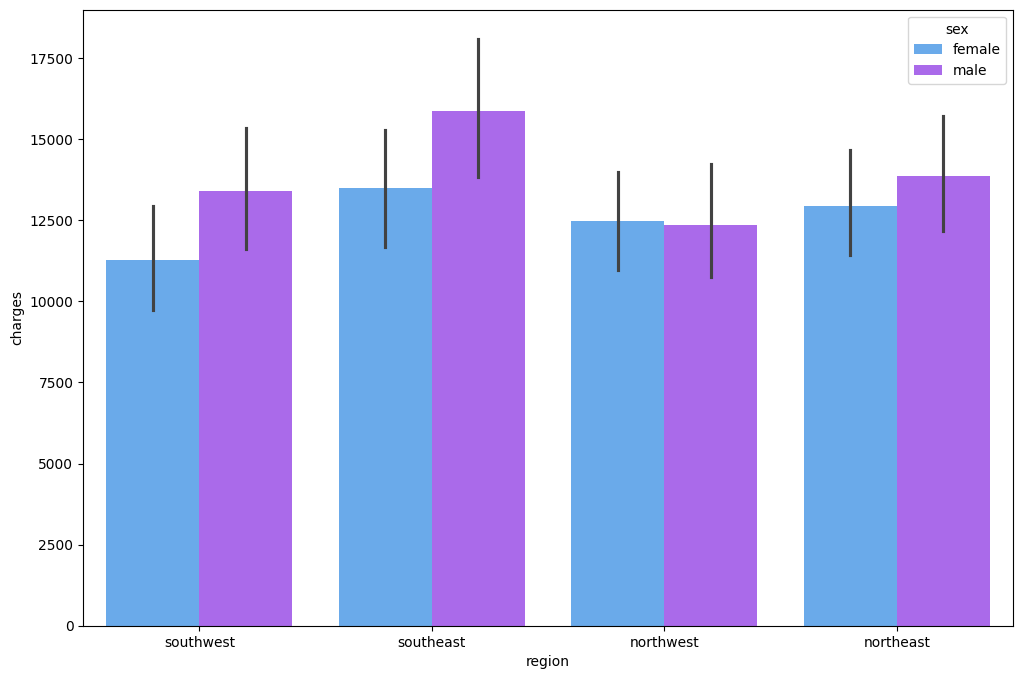

In [102]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

##### **7. Melihat pengaruh variabel merokok atau tidak terhadap biaya kesehatan.**

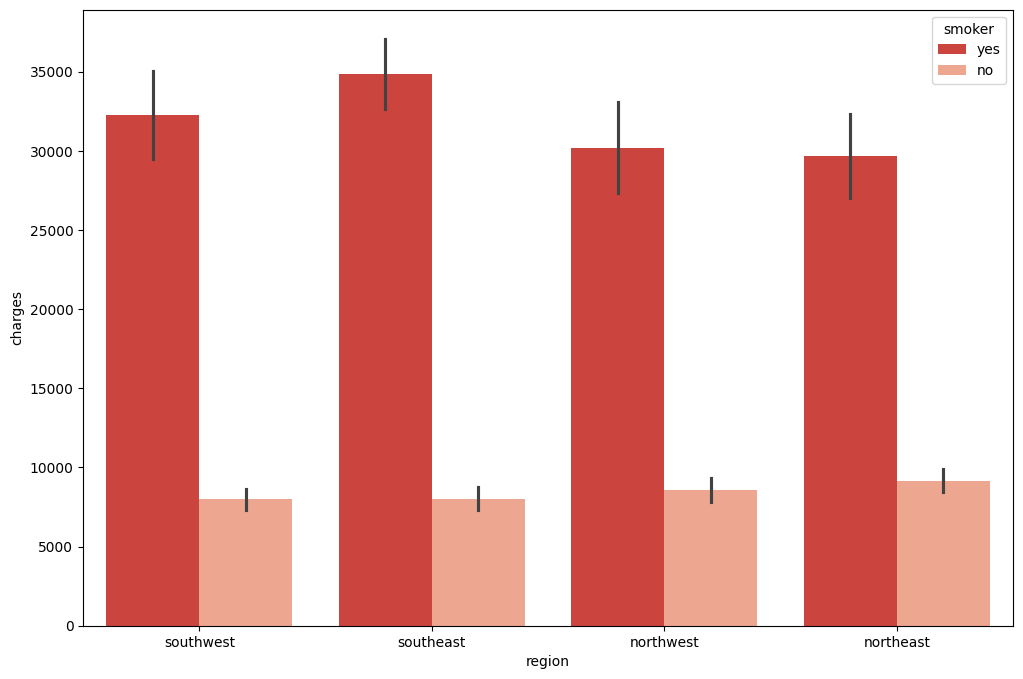

In [103]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r')

##### **8. Melihat pengaruh jumlah anak yang dimiliki oleh pasien terhadap biaya kesehatan yang diklaim.**

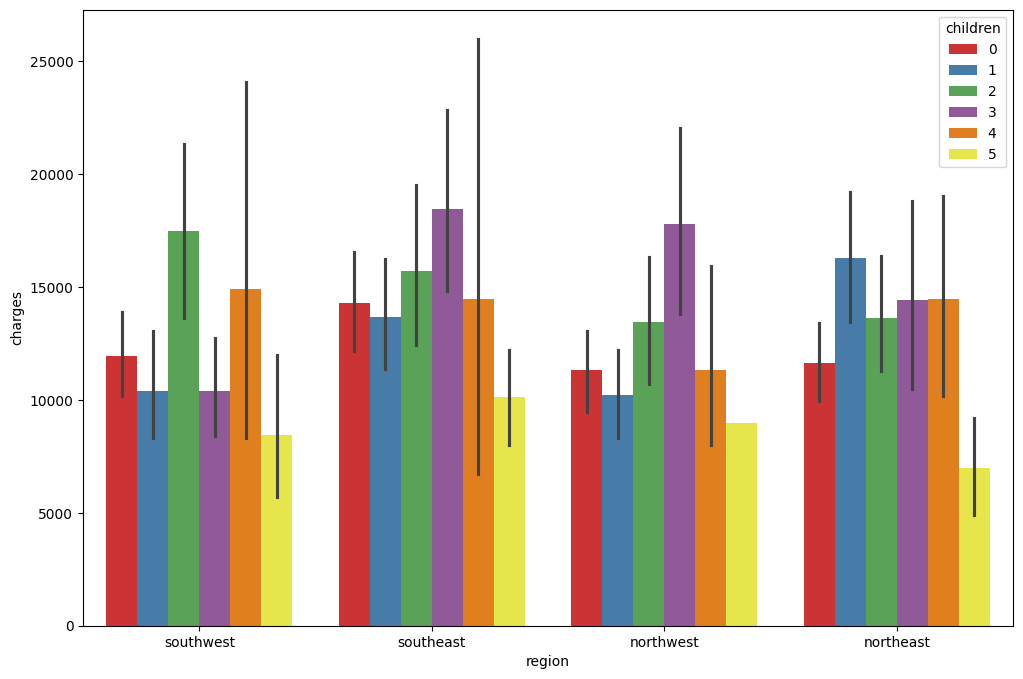

In [104]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

##### **9. Menganalisa dua variabel selanjutnya yaitu umur dan BMI, sekaligus menyertakan variabel merokok atau tidak.**

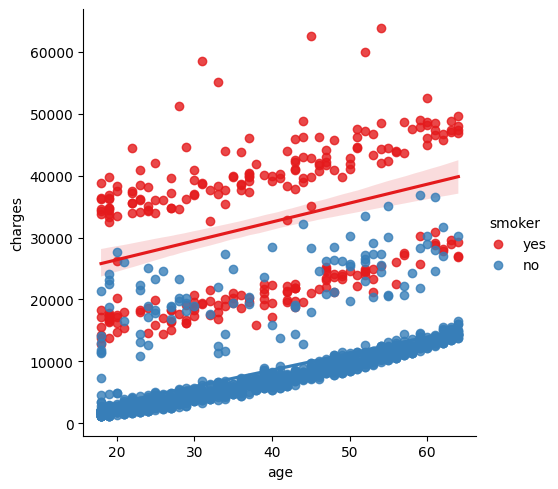

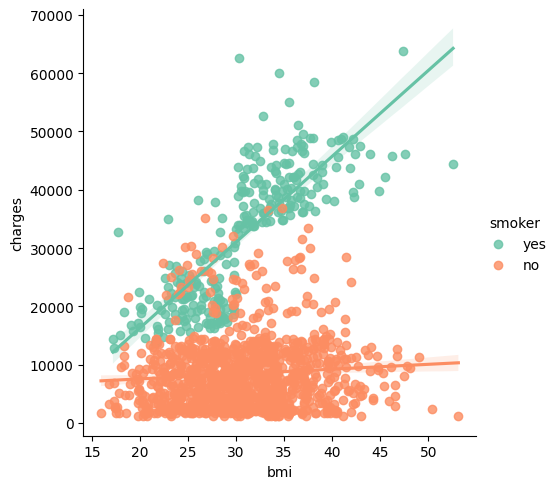

In [105]:
ax = sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set2')

##### **10. Melakukan prediksi biaya medis suatu pasien dengan menggunakan algoritma regresi linear.**

In [106]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

##### **11. Mengubah data yang sudah diubah menjadi kategorikal pada langkah sebelumnya ke data numerikal.**

In [107]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

##### **12. Melakukan pemanggilan terhadap library yang akan digunakan untuk mengeksekusi algoritma linear regression.**

In [108]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##### **13. Mendefinisikan data training dan data testing yang akan kita gunakan dalam eksperimen.**

In [109]:
x = df.drop(['charges'], axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

##### **14. Melakukan proses training (fitting) model linear regression kita dengan menggunakan data training yaitu x_train dan y_train.**

In [110]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

##### **15. Melakukan testing dengan menggunakan data testing yang telah kita persiapkan.**

In [111]:
y_pred = linear_reg.predict(x_test)

##### **16. Melakukan evaluasi terhadap performa prediksi model linear regression yang telah dikembangkan.**

In [112]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R2 : {0:.3f}'.format(R2))
print('RMSE : {0:.3f}'.format(rmse))

R2 : 0.800
RMSE : 5643.220


##### **17. Meningkatkan performa model linear regression dalam melakukan prediksi dengan mengeliminasi fitur yang tidak terlalu berpengaruh**

In [113]:
importance = linear_reg.coef_
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

for i, v in zip(variables, importance):
    print('Feature: {}, Score: {:.5f}'.format(i, v))

Feature: age, Score: 253.99185
Feature: sex, Score: -24.32455
Feature: bmi, Score: 328.40262
Feature: children, Score: 443.72930
Feature: smoker, Score: 23568.87948
Feature: region, Score: -288.50857


##### **18. Menyimpulkan bahwa faktor merokok atau tidaknya pasien merupakan fitur paling penting untuk menentukan biaya medis pasien.**

## **Assignment**

Dikerjakan saat ini, jika tidak selesai bisa dilanjutkan di rumah.
Kasus:
Pada tugas ini, anda akan diberikan sebuah dataset tentang karakteristik beberapa rumah beserta dengan harganya. Tugas anda adalah memprediksi harga rumah dengan menggunakan algoritma regresi linear. Dataset dapat diunduh pada tautan yang tercantum bagian alat dan bahan dengan nama file Real estate.csv. Pada dataset ini terdapat beberapa kolom diantaranya:
1. transaction date
2. house age
3. distance to the nearest MRT station
4. number of convenience stores
5. latitude
6. longitude
7. house price of unit area

Dari data di atas data nomor 7 yang akan menjadi kelas target.Silahkan ikuti langkah-langkah praktikum di atas untuk mengerjakan tugas ini. Beberapa hal yang perlu kalian perhatikan adalah:

##### **1. Silahkan kerjakan tugas ini dengan mengikuti semua langkah-langkah di atas. Untuk visualisasi dan analisa data (langkah 5 sampai langkah 9) bersifat opsional. Namun yang mengerjakan langkah 5 sampai 9 akan mendapatkan nilai yang maksimal**

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [115]:
data_re = pd.read_csv('Real estate.csv')
data_re.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [116]:
data_re.info()
data_re.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [117]:
data_re.isnull().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


<ipython-input-118-31a53c1fbd46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = house_price.head(), y = house_price.head().index, palette='Blues')


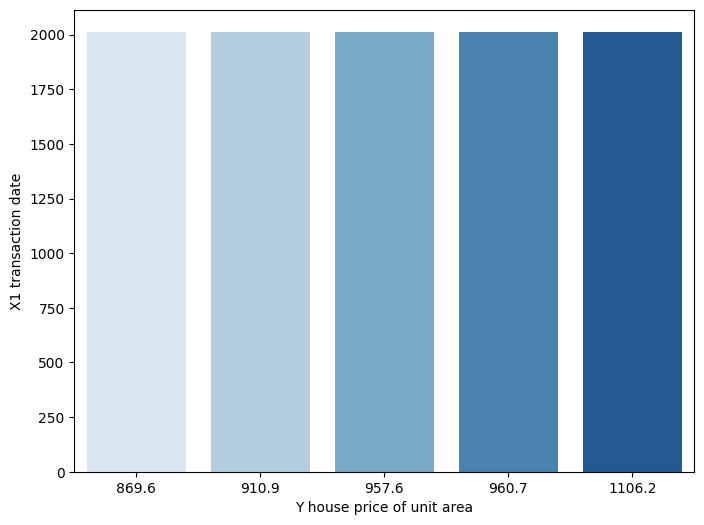

In [118]:
house_price = data_re['Y house price of unit area'].groupby(data_re['X1 transaction date']).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x = house_price.head(), y = house_price.head().index, palette='Blues')

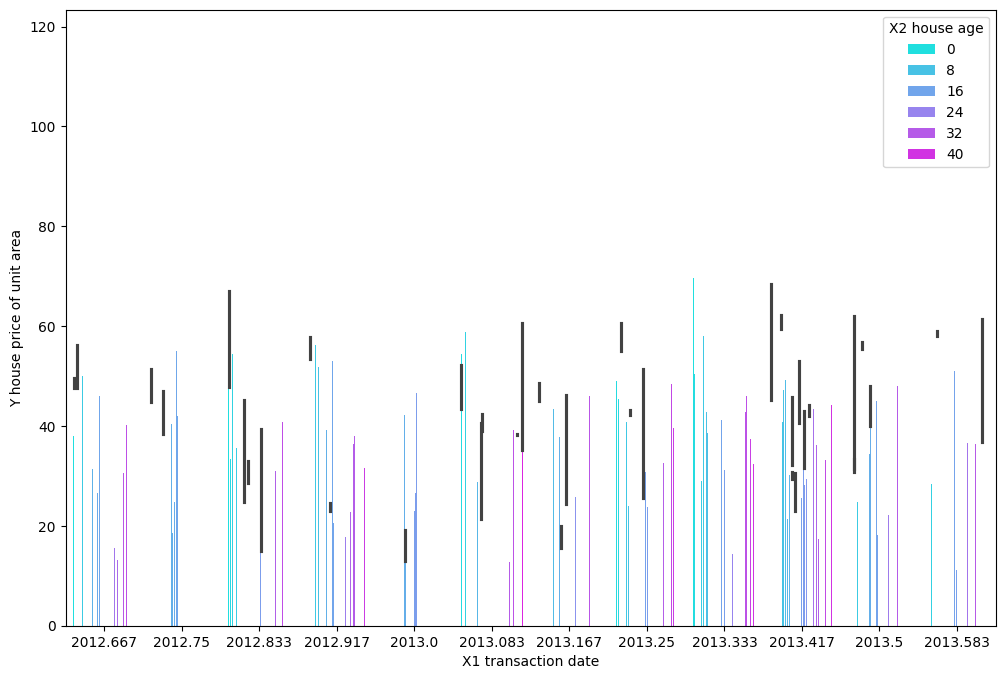

In [119]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X1 transaction date', y='Y house price of unit area', hue='X2 house age', data=data_re, palette='cool')

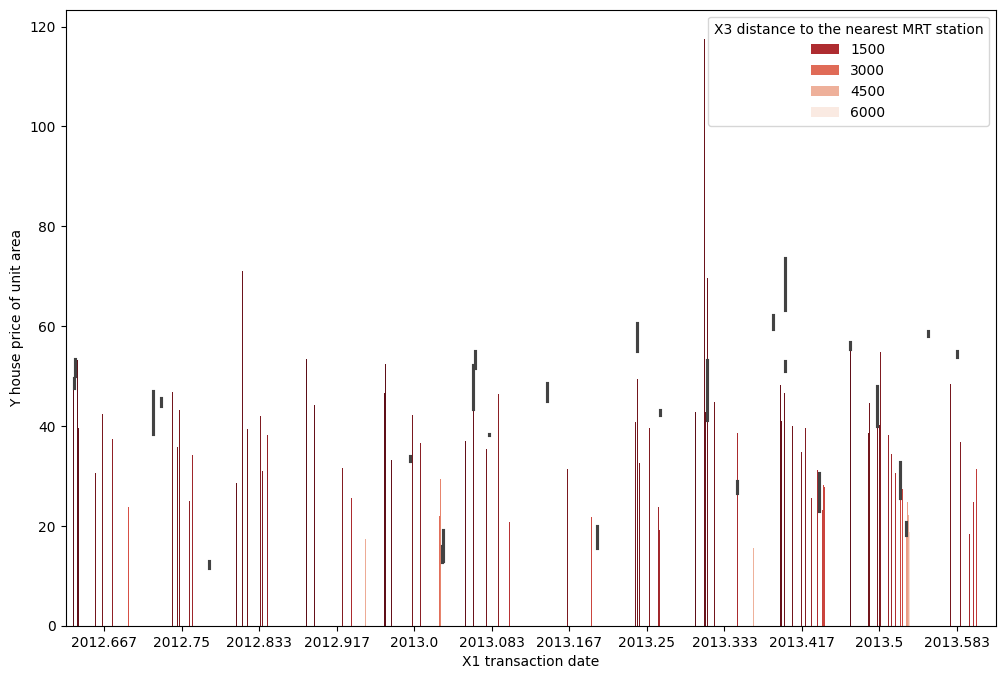

In [120]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X1 transaction date', y='Y house price of unit area', hue='X3 distance to the nearest MRT station', data=data_re, palette='Reds_r')

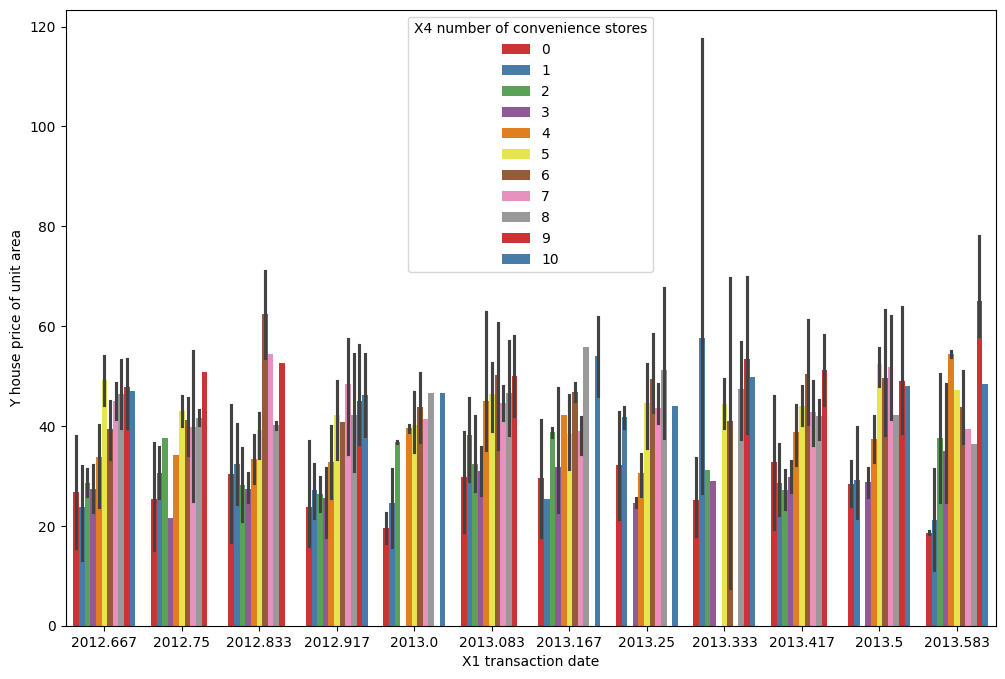

In [121]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X1 transaction date', y='Y house price of unit area', hue='X4 number of convenience stores', data=data_re, palette='Set1')

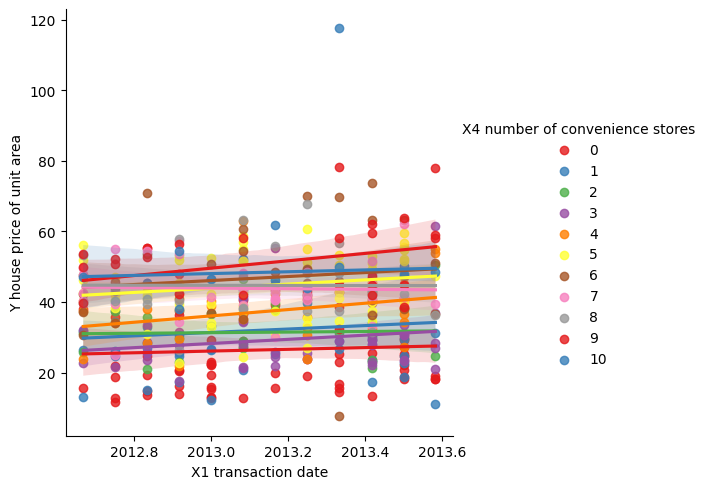

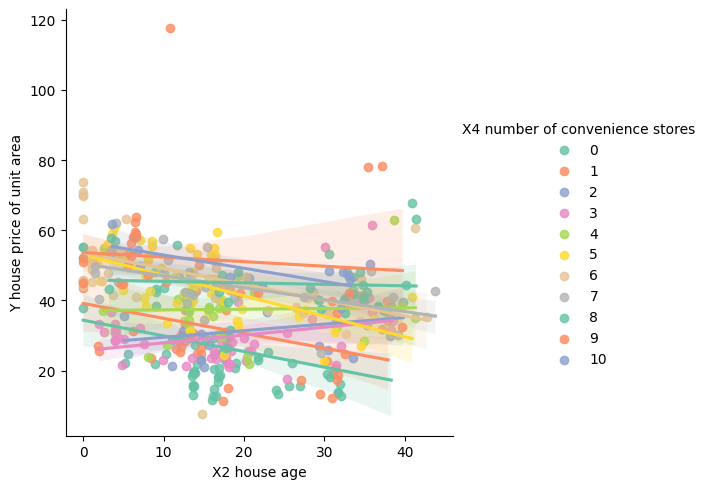

In [122]:
ax = sns.lmplot(x='X1 transaction date', y='Y house price of unit area', hue='X4 number of convenience stores', data=data_re, palette='Set1')
ax = sns.lmplot(x='X2 house age', y='Y house price of unit area', hue='X4 number of convenience stores', data=data_re, palette='Set2')

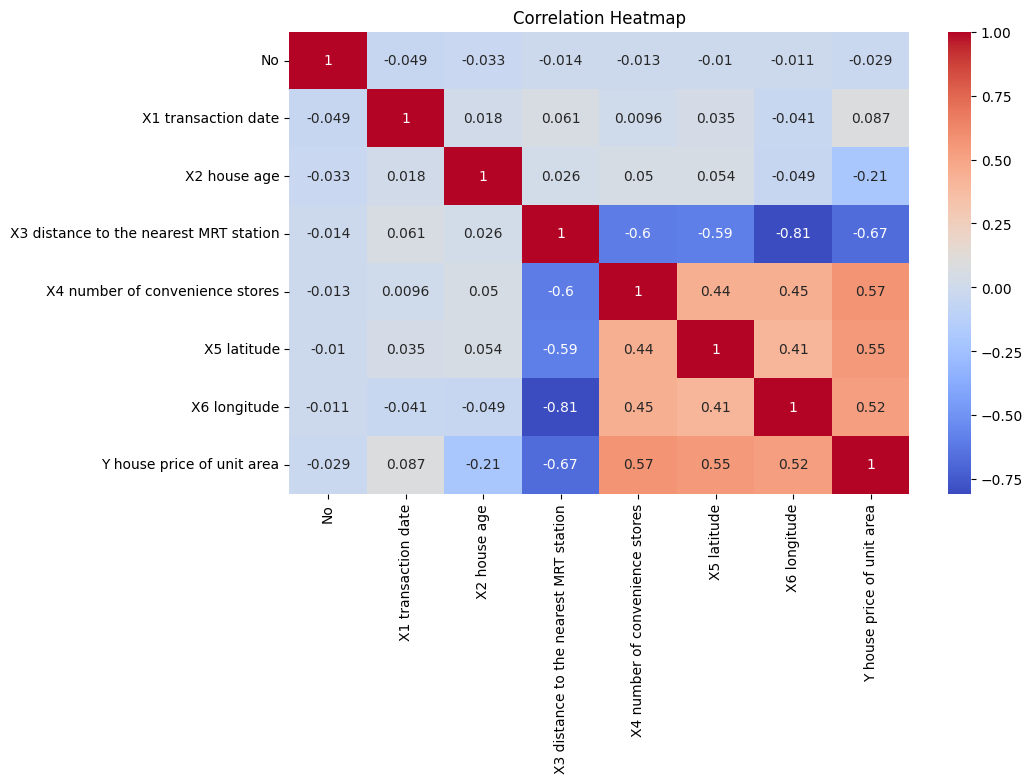

In [123]:
# Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(data_re.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

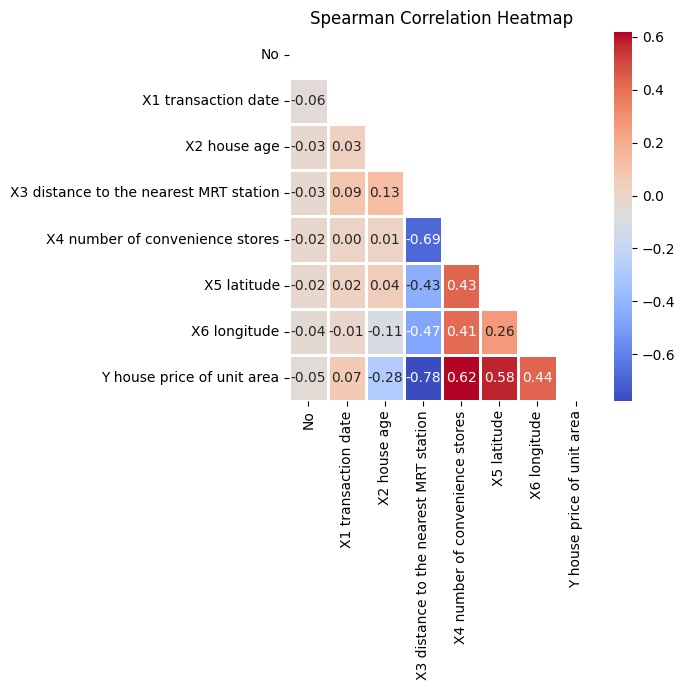

In [124]:
# Korelasi antar fitur
mask = np.triu(np.ones_like(data_re.corr()))
plt.figure(figsize=(11, 7))

plt.subplot(1, 2, 1)
sns.heatmap(data_re.corr(method='spearman'), annot=True, linewidths=.9, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Spearman Correlation Heatmap')
# plt.show()
plt.tight_layout()

<ipython-input-125-f4fe7fbfa226>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=data_re, palette='Set1')


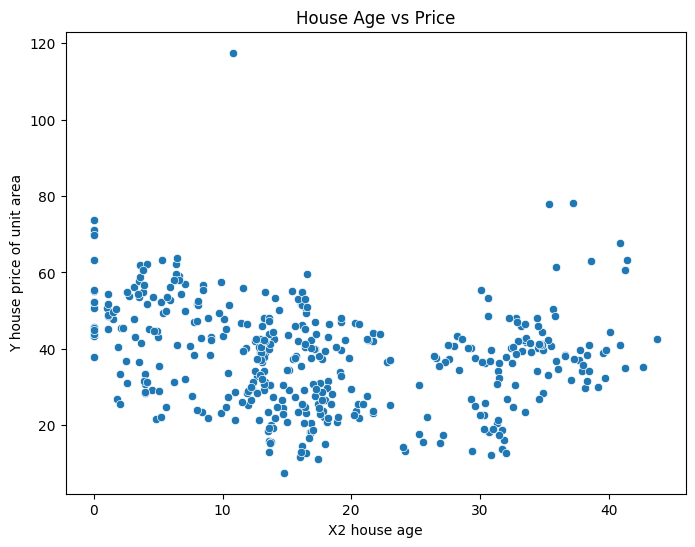

In [125]:
# Visualisasi harga rumah berdasarkan usia rumah
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=data_re, palette='Set1')
plt.title('House Age vs Price')
plt.show()

<ipython-input-126-a5fc64d7de21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data_re, palette='viridis')


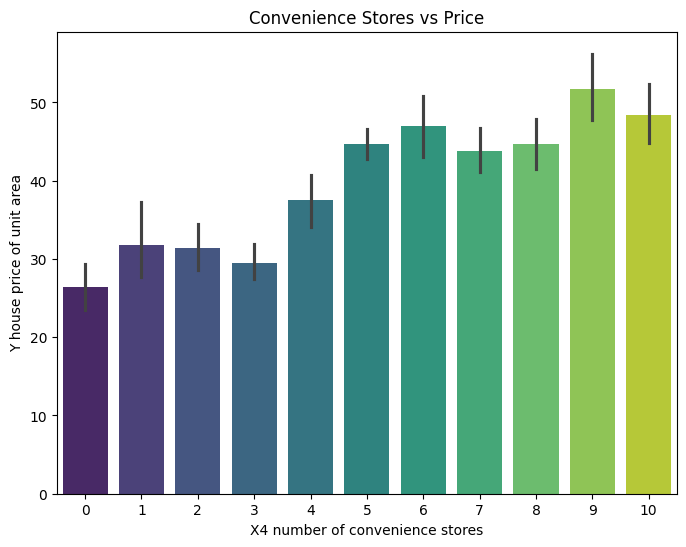

In [126]:
# Visualisasi jumlah convenience store vs harga rumah
plt.figure(figsize=(8, 6))
sns.barplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data_re, palette='viridis')
plt.title('Convenience Stores vs Price')
plt.show()

In [127]:
# Menghapus kolom yang tidak relevan
x = data_re.drop(['No','Y house price of unit area'], axis=1) # Menghapus kolom ID dan target
y = data_re['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [128]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [129]:
# Melakukan prediksi
y_pred = linear_reg.predict(x_test)

In [130]:
# Evaluasi model
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'R-squared: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')

R-squared: 0.657
RMSE: 7.715


In [131]:
# Menampilkan koefisien regresi
importance = linear_reg.coef_
for feature, score in zip(x.columns, importance):
    print(f'Feature: {feature}, Score: {score:.5f}')

Feature: X1 transaction date, Score: 5.02037
Feature: X2 house age, Score: -0.26313
Feature: X3 distance to the nearest MRT station, Score: -0.00446
Feature: X4 number of convenience stores, Score: 1.09258
Feature: X5 latitude, Score: 225.48890
Feature: X6 longitude, Score: -6.80648


##### **2. Jika menurut anda ada fitur atau data yang tidak berpengaruh terhadap harga rumah, anda bisa mengeliminasi fitur tersebut. Kemudian bandingkan hasilnya dengan ketika menggunakan semua fitur.**

In [132]:
# Menghapus fitur yang kurang relevan
x_reduced = x.drop(['X1 transaction date', 'X6 longitude'], axis=1)

In [133]:
# Membagi ulang data
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

In [134]:
# Melatih model regresi linear
linear_reg_red = LinearRegression()
linear_reg_red.fit(x_train_red, y_train_red)

LinearRegression()

In [135]:
# Melakukan prediksi
y_pred_red = linear_reg_red.predict(x_test_red)

In [136]:
# Evaluasi ulang
r2_red = metrics.r2_score(y_test_red, y_pred_red)
rmse_red = np.sqrt(metrics.mean_squared_error(y_test_red, y_pred_red))

print(f'R-squared (reduced): {r2_red:.3f}')
print(f'RMSE (reduced): {rmse_red:.3f}')

R-squared (reduced): 0.676
RMSE (reduced): 7.369
